In [1]:
#####################
# Library Loading
#####################
suppressPackageStartupMessages({
    library(Seurat)
    library(cowplot)
    library(tidyverse)
    library(repr)
    library(scales)
    library(hash)
    library(ggsci)
    library(ggrepel)
    library(grid)
})

In [23]:
#####################
# Color Pallett
#####################
JCO_PALLETT = pal_jco("default")(10)
PLOTLY_Pallett = c('#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf')
DEFAULT_PALLETT = PLOTLY_Pallett
GroupID_Order_List = c("CCR6neg", "CCR6low", "CCR6int", "CCR6high")
GroupID_Color_Dict = c("CCR6neg"="#FFA500", "CCR6low"="#0456f8", "CCR6int"="#1D8F06", "CCR6high"="#e51134")

In [3]:
######################
# LOAD DATA
######################
alldata <- readRDS("./Result/CCR6_Project_04_TSNE_Clustering.rds")

In [4]:
###############
#
###############
Cluster_Resolution = 'RNA_snn_res.0.2'
new_cluster_name_List <- c("BMW", "FORD", "FERRARI", "PORSCHE", "TOYOTA", "ACURA", "HONDA", "DODGE", "GMC", "AUDI", "TESLA", "MAZDA", "KARMA", "SMART")

In [5]:
####################
#FEATURE ORDER/COLOR
####################
Feature_Order_List = new_cluster_name_List
Feature_List_Size = length(Feature_Order_List)
Feature_Label_Dict = Feature_Order_List
names(Feature_Label_Dict) = Feature_Order_List
Feature_Order_Factor = factor(Feature_Order_List, levels=Feature_Order_List)
if(Feature_List_Size > 10){
    Feature_Color_List = colorRampPalette(DEFAULT_PALLETT)(Feature_List_Size)
}else{
    Feature_Color_List = DEFAULT_PALLETT[1:Feature_List_Size]
}
Feature_Color_Dict = Feature_Color_List
names(Feature_Color_Dict) = Feature_Order_List


In [6]:
#################
#Rename clusters
#################
alldata <- SetIdent(alldata, value = Cluster_Resolution)
#
old_cluster_name_List = levels(alldata@meta.data[[Cluster_Resolution]])
names(new_cluster_name_List) <- old_cluster_name_List
#
alldata <- RenameIdents(alldata, new_cluster_name_List)
head(alldata@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent_mito,percent_ribo,RNA_snn_res.0.1,seurat_clusters,RNA_snn_res.0.2
CCR6neg_AAACCTGCAGTTCATG-1,CCR6neg,3975,1182,4.477987,47.57233,2,0,0
CCR6neg_AAACCTGGTAAGGGCT-1,CCR6neg,4834,1187,3.289201,53.62019,1,1,1
CCR6neg_AAACCTGTCAACCATG-1,CCR6neg,4677,1358,3.912765,45.90549,2,0,0
CCR6neg_AAACCTGTCAGCATGT-1,CCR6neg,4715,1246,3.753977,46.76564,4,5,5
CCR6neg_AAACGGGAGTCAAGCG-1,CCR6neg,1885,711,4.562334,46.73740,0,4,4
CCR6neg_AAACGGGGTCTTCAAG-1,CCR6neg,2735,977,3.363803,41.20658,0,2,2


In [7]:
label_DF = as.data.frame(alldata@active.ident) %>% 
    rename(cluster_label = `alldata@active.ident`)
head(label_DF)

,cluster_label
CCR6neg_AAACCTGCAGTTCATG-1,BMW
CCR6neg_AAACCTGGTAAGGGCT-1,FORD
CCR6neg_AAACCTGTCAACCATG-1,BMW
CCR6neg_AAACCTGTCAGCATGT-1,ACURA
CCR6neg_AAACGGGAGTCAAGCG-1,TOYOTA
CCR6neg_AAACGGGGTCTTCAAG-1,FERRARI


In [8]:
alldata <- AddMetaData(
  object = alldata,
  metadata = label_DF,
  col.name = 'cluster_label'
)

In [9]:
head(alldata@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent_mito,percent_ribo,RNA_snn_res.0.1,seurat_clusters,RNA_snn_res.0.2,cluster_label
CCR6neg_AAACCTGCAGTTCATG-1,CCR6neg,3975,1182,4.477987,47.57233,2,0,0,BMW
CCR6neg_AAACCTGGTAAGGGCT-1,CCR6neg,4834,1187,3.289201,53.62019,1,1,1,FORD
CCR6neg_AAACCTGTCAACCATG-1,CCR6neg,4677,1358,3.912765,45.90549,2,0,0,BMW
CCR6neg_AAACCTGTCAGCATGT-1,CCR6neg,4715,1246,3.753977,46.76564,4,5,5,ACURA
CCR6neg_AAACGGGAGTCAAGCG-1,CCR6neg,1885,711,4.562334,46.73740,0,4,4,TOYOTA
CCR6neg_AAACGGGGTCTTCAAG-1,CCR6neg,2735,977,3.363803,41.20658,0,2,2,FERRARI


In [10]:
###################
#FIND Biomarkers
###################
alldata <- SetIdent(alldata, value = "cluster_label")
markers_genes <- FindAllMarkers(alldata,
                               test.use = "t",
                               only.pos = FALSE,
                               assay = "RNA",
                               verbose=TRUE)

Calculating cluster BMW

Calculating cluster FORD

Calculating cluster FERRARI

Calculating cluster PORSCHE

Calculating cluster TOYOTA

Calculating cluster ACURA

Calculating cluster HONDA

Calculating cluster DODGE

Calculating cluster GMC

Calculating cluster AUDI

Calculating cluster TESLA

Calculating cluster MAZDA

Calculating cluster KARMA

Calculating cluster SMART



In [11]:
head(markers_genes)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
ZFP36L2,2.534855e-116,0.3212186,0.997,0.983,8.501397e-112,BMW,ZFP36L2
CCR6,6.619279e-86,-0.4918412,0.159,0.374,2.219974e-81,BMW,CCR6
LGALS3,1.651880e-82,-0.4027078,0.062,0.219,5.540076e-78,BMW,LGALS3
YWHAH,5.081151e-65,-0.3412412,0.086,0.247,1.704116e-60,BMW,YWHAH
S100A4,5.945016e-58,-0.5205518,0.735,0.827,1.993839e-53,BMW,S100A4
KLRB1,1.037801e-56,-0.5030859,0.375,0.581,3.480576e-52,BMW,KLRB1


In [12]:
selected_biomarkers_DF = markers_genes %>% 
    group_by(cluster)  %>% 
    top_n(-5, p_val_adj)
head(selected_biomarkers_DF)

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
2.534855e-116,0.3212186,0.997,0.983,8.501397e-112,BMW,ZFP36L2
6.619279e-86,-0.4918412,0.159,0.374,2.219974e-81,BMW,CCR6
1.651880e-82,-0.4027078,0.062,0.219,5.540076e-78,BMW,LGALS3
5.081151e-65,-0.3412412,0.086,0.247,1.704116e-60,BMW,YWHAH
5.945016e-58,-0.5205518,0.735,0.827,1.993839e-53,BMW,S100A4
1.745877e-122,0.4307172,0.967,0.790,5.855321e-118,FORD,S100A4


In [13]:
################
#Scale by top features
################
alldata <- ScaleData(alldata, features = as.character(unique(selected_biomarkers_DF$gene)), assay = "RNA")

Centering and scaling data matrix



In [14]:
#################
#
#################
scaled_DF = as.data.frame(alldata@assays$RNA@scale.data)
data.use <- MinMax(data = scaled_DF, min = -2.5, max = 2.5)
scaled_data_DF = data.use %>%
    rownames_to_column(var="GeneID")

In [15]:
######################
# Extract metadata from Seurat object
######################
metadata_DF = as.data.frame(alldata@meta.data) %>% 
    rownames_to_column(var="UMI") %>%
    select(UMI, orig.ident, cluster_label)
head(metadata_DF)

UMI,orig.ident,cluster_label
CCR6neg_AAACCTGCAGTTCATG-1,CCR6neg,BMW
CCR6neg_AAACCTGGTAAGGGCT-1,CCR6neg,FORD
CCR6neg_AAACCTGTCAACCATG-1,CCR6neg,BMW
CCR6neg_AAACCTGTCAGCATGT-1,CCR6neg,ACURA
CCR6neg_AAACGGGAGTCAAGCG-1,CCR6neg,TOYOTA
CCR6neg_AAACGGGGTCTTCAAG-1,CCR6neg,FERRARI


In [16]:
gather_scaled_data_DF = scaled_data_DF %>%
    gather(UMI, expression, -GeneID) %>%
    inner_join(metadata_DF, by = c("UMI", "UMI"))
head(gather_scaled_data_DF)

GeneID,UMI,expression,orig.ident,cluster_label
NBL1,CCR6neg_AAACCTGCAGTTCATG-1,-0.4482153,CCR6neg,BMW
RPS8,CCR6neg_AAACCTGCAGTTCATG-1,-0.4790483,CCR6neg,BMW
JUN,CCR6neg_AAACCTGCAGTTCATG-1,0.5464503,CCR6neg,BMW
S100A6,CCR6neg_AAACCTGCAGTTCATG-1,-0.1709449,CCR6neg,BMW
S100A4,CCR6neg_AAACCTGCAGTTCATG-1,-1.7187580,CCR6neg,BMW
RPS27,CCR6neg_AAACCTGCAGTTCATG-1,1.6330108,CCR6neg,BMW


In [17]:
processed_gather_scaled_data_DF = gather_scaled_data_DF


In [18]:
gene_levels = ordered(as.character(unique(selected_biomarkers_DF$gene)))


In [19]:
##################
#Plot Heatmap ggplot
##################
heatmap_base = ggplot(data = processed_gather_scaled_data_DF , aes(x=reorder(UMI, desc(UMI)), y=ordered(GeneID, levels=rev(gene_levels)), fill = expression)) + 
    geom_tile() +
    scale_fill_gradient2(
        low = rev(c('#d1e5f0','#67a9cf','#2166ac')),
        mid = "white",
        high = rev(c('#b2182b','#ef8a62','#fddbc7')),
        midpoint = 0,
        name= "Zscore",
        guide = guide_colorbar(direction = "vertical", title.position = "top")
    ) + 
    theme(
        axis.line=element_blank(), 
        axis.title=element_blank(),
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        strip.background = element_blank(),
        strip.text = element_blank(),
        panel.spacing = unit(x = 0.15, units = 'lines'),
        axis.text.y = element_text(size=10,  family="sans", face="bold", color = "black", angle=0, hjust =0),
        legend.margin = margin(t=-0.6, r=0, b=0, l=0, unit="mm"),
        #strip.placement = "outside",
        #plot.margin = unit(c(0, 0, 0, 0), units = "lines")
    ) +
    facet_grid(
        facets = ~cluster_label,
        drop = TRUE,
        space = "free",
        scales = "free",
        #switch = 'x',
    ) +
    scale_y_discrete(position = "right", labels = rev(gene_levels)) + 
    scale_x_discrete(expand = c(0, 0), drop = TRUE)

In [20]:
options(repr.plot.width=15, repr.plot.height=2.5, repr.plot.res = 200)
heatmap_annotation1 <- ggplot(processed_gather_scaled_data_DF, aes(x = UMI, y = 1, fill = cluster_label, color=cluster_label))+
  geom_bar( 
stat = "identity",
position = "identity",
       width = 1,
          na.rm=TRUE)+
    scale_fill_manual(breaks = Feature_Order_List, labels=Feature_Label_Dict, values=Feature_Color_Dict) +
    scale_color_manual(breaks = Feature_Order_List, labels=Feature_Label_Dict, values=Feature_Color_Dict) +
    theme_void() +
    labs(title = NULL, subtitle = NULL, caption = NULL, tag = NULL, x=NULL, y=NULL) +
      theme(
            panel.spacing.x = unit(0.15, "lines"),
            strip.background = element_blank(),
            strip.text = element_blank(),
            legend.title = element_blank(),
            legend.position = "right",
            legend.margin = margin(t=0, r=0, b=0, l=0, unit="mm"),
           ) +
        #guides(fill=guide_legend(ncol=1)) +
        facet_grid(~cluster_label, scales = "free")

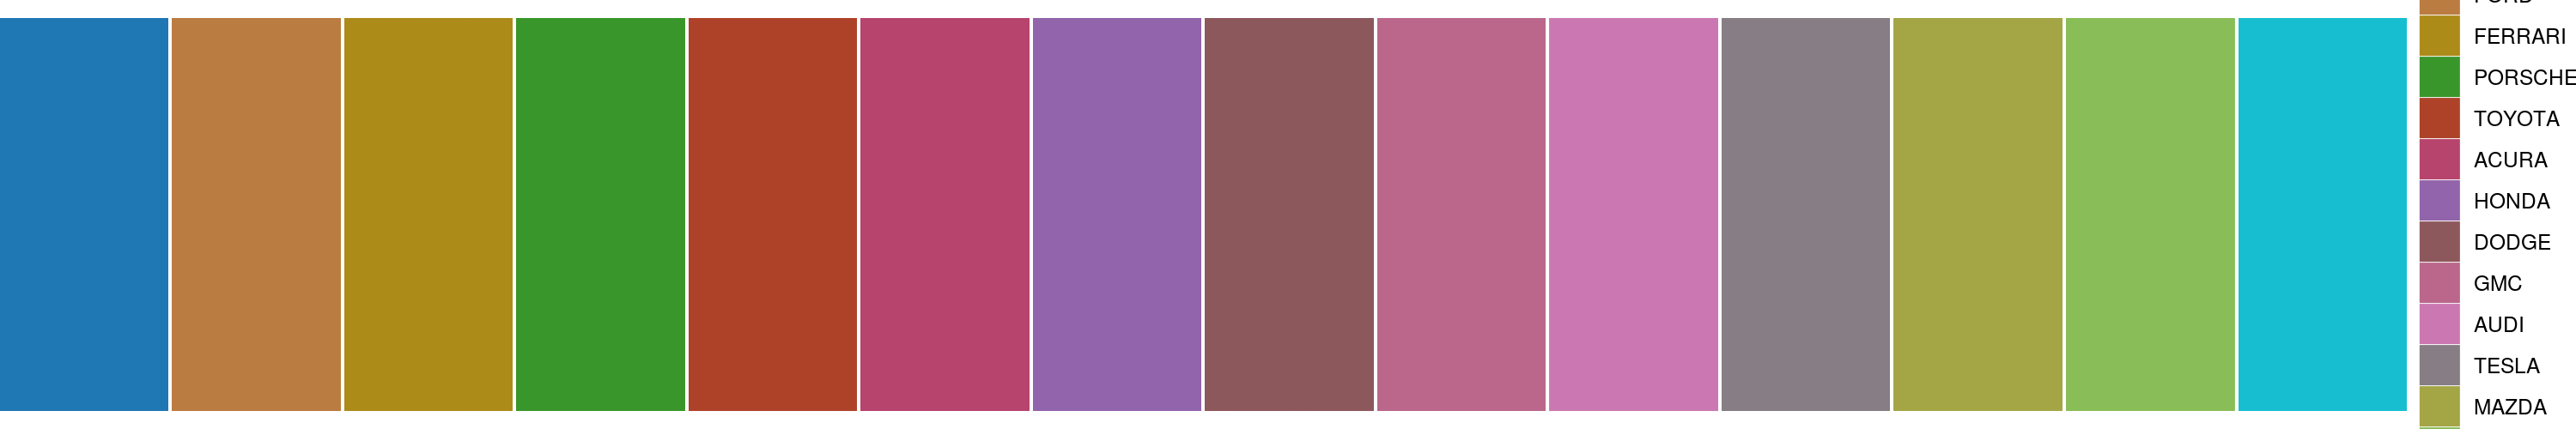

In [21]:
heatmap_annotation1

In [54]:
options(repr.plot.width=15, repr.plot.height=2.5, repr.plot.res = 200)
heatmap_annotation2 <- ggplot(processed_gather_scaled_data_DF, aes(x = reorder(UMI, desc(UMI)), y = 1, fill = orig.ident, color=orig.ident))+
  geom_bar( 
stat = "identity",
position = "identity",
       width = 1,
          na.rm=TRUE)+
    scale_fill_manual(breaks = GroupID_Order_List, labels=GroupID_Order_List, values=GroupID_Color_Dict) +
    scale_color_manual(breaks = GroupID_Order_List, labels=GroupID_Order_List, values=GroupID_Color_Dict) +
#scale_y_discrete(breaks = GroupID_Order_List, labels=GroupID_Order_List, limits=GroupID_Order_List) +
    theme_void() +
    labs(title = NULL, subtitle = NULL, caption = NULL, tag = NULL, x=NULL, y=NULL) +
      theme(
            panel.spacing.x = unit(0.15, "lines"),
            strip.background = element_blank(),
            strip.text = element_blank(),
            legend.title = element_blank(),
            legend.position = "right",
            legend.margin = margin(t=0, r=0, b=0, l=0, unit="mm"),
           ) +
        #guides(fill=guide_legend(ncol=1)) +
        facet_grid(~cluster_label, scales = "free")

In [56]:
heatmap_base_legend = get_legend(heatmap_base)
heatmap_annotation1_legend = get_legend(heatmap_annotation1)
heatmap_annotation2_legend = get_legend(heatmap_annotation2)
heatmap_base_NO_legend = heatmap_base + theme(legend.position = "none", plot.margin = unit(c(0, 0, 0, 0), "mm"))
heatmap_annotation1_NO_legend = heatmap_annotation1 + theme(legend.position = "none", plot.margin = unit(c(0, 0, 0, 0), "mm"))
heatmap_annotation2_NO_legend = heatmap_annotation2 + theme(legend.position = "none", plot.margin = unit(c(0, 0, 0, 0), "mm"))

In [57]:
heatmap_base_annotation = plot_grid(heatmap_annotation2_NO_legend, 
                                    heatmap_annotation1_NO_legend, 
                                    heatmap_base_NO_legend,  
                                    align = "v", 
                                    ncol = 1, 
                                    axis = "tb", 
                                    rel_heights = c(0.25, 0.25, 15))

In [58]:
heatmap_base_annotation_legend = plot_grid(
    heatmap_annotation1_legend, 
    NULL,
    heatmap_annotation2_legend, 
    NULL,
    heatmap_base_legend, 
    ncol = 1, align = "hv", rel_heights = c(2, -1, 2, -1, 2))

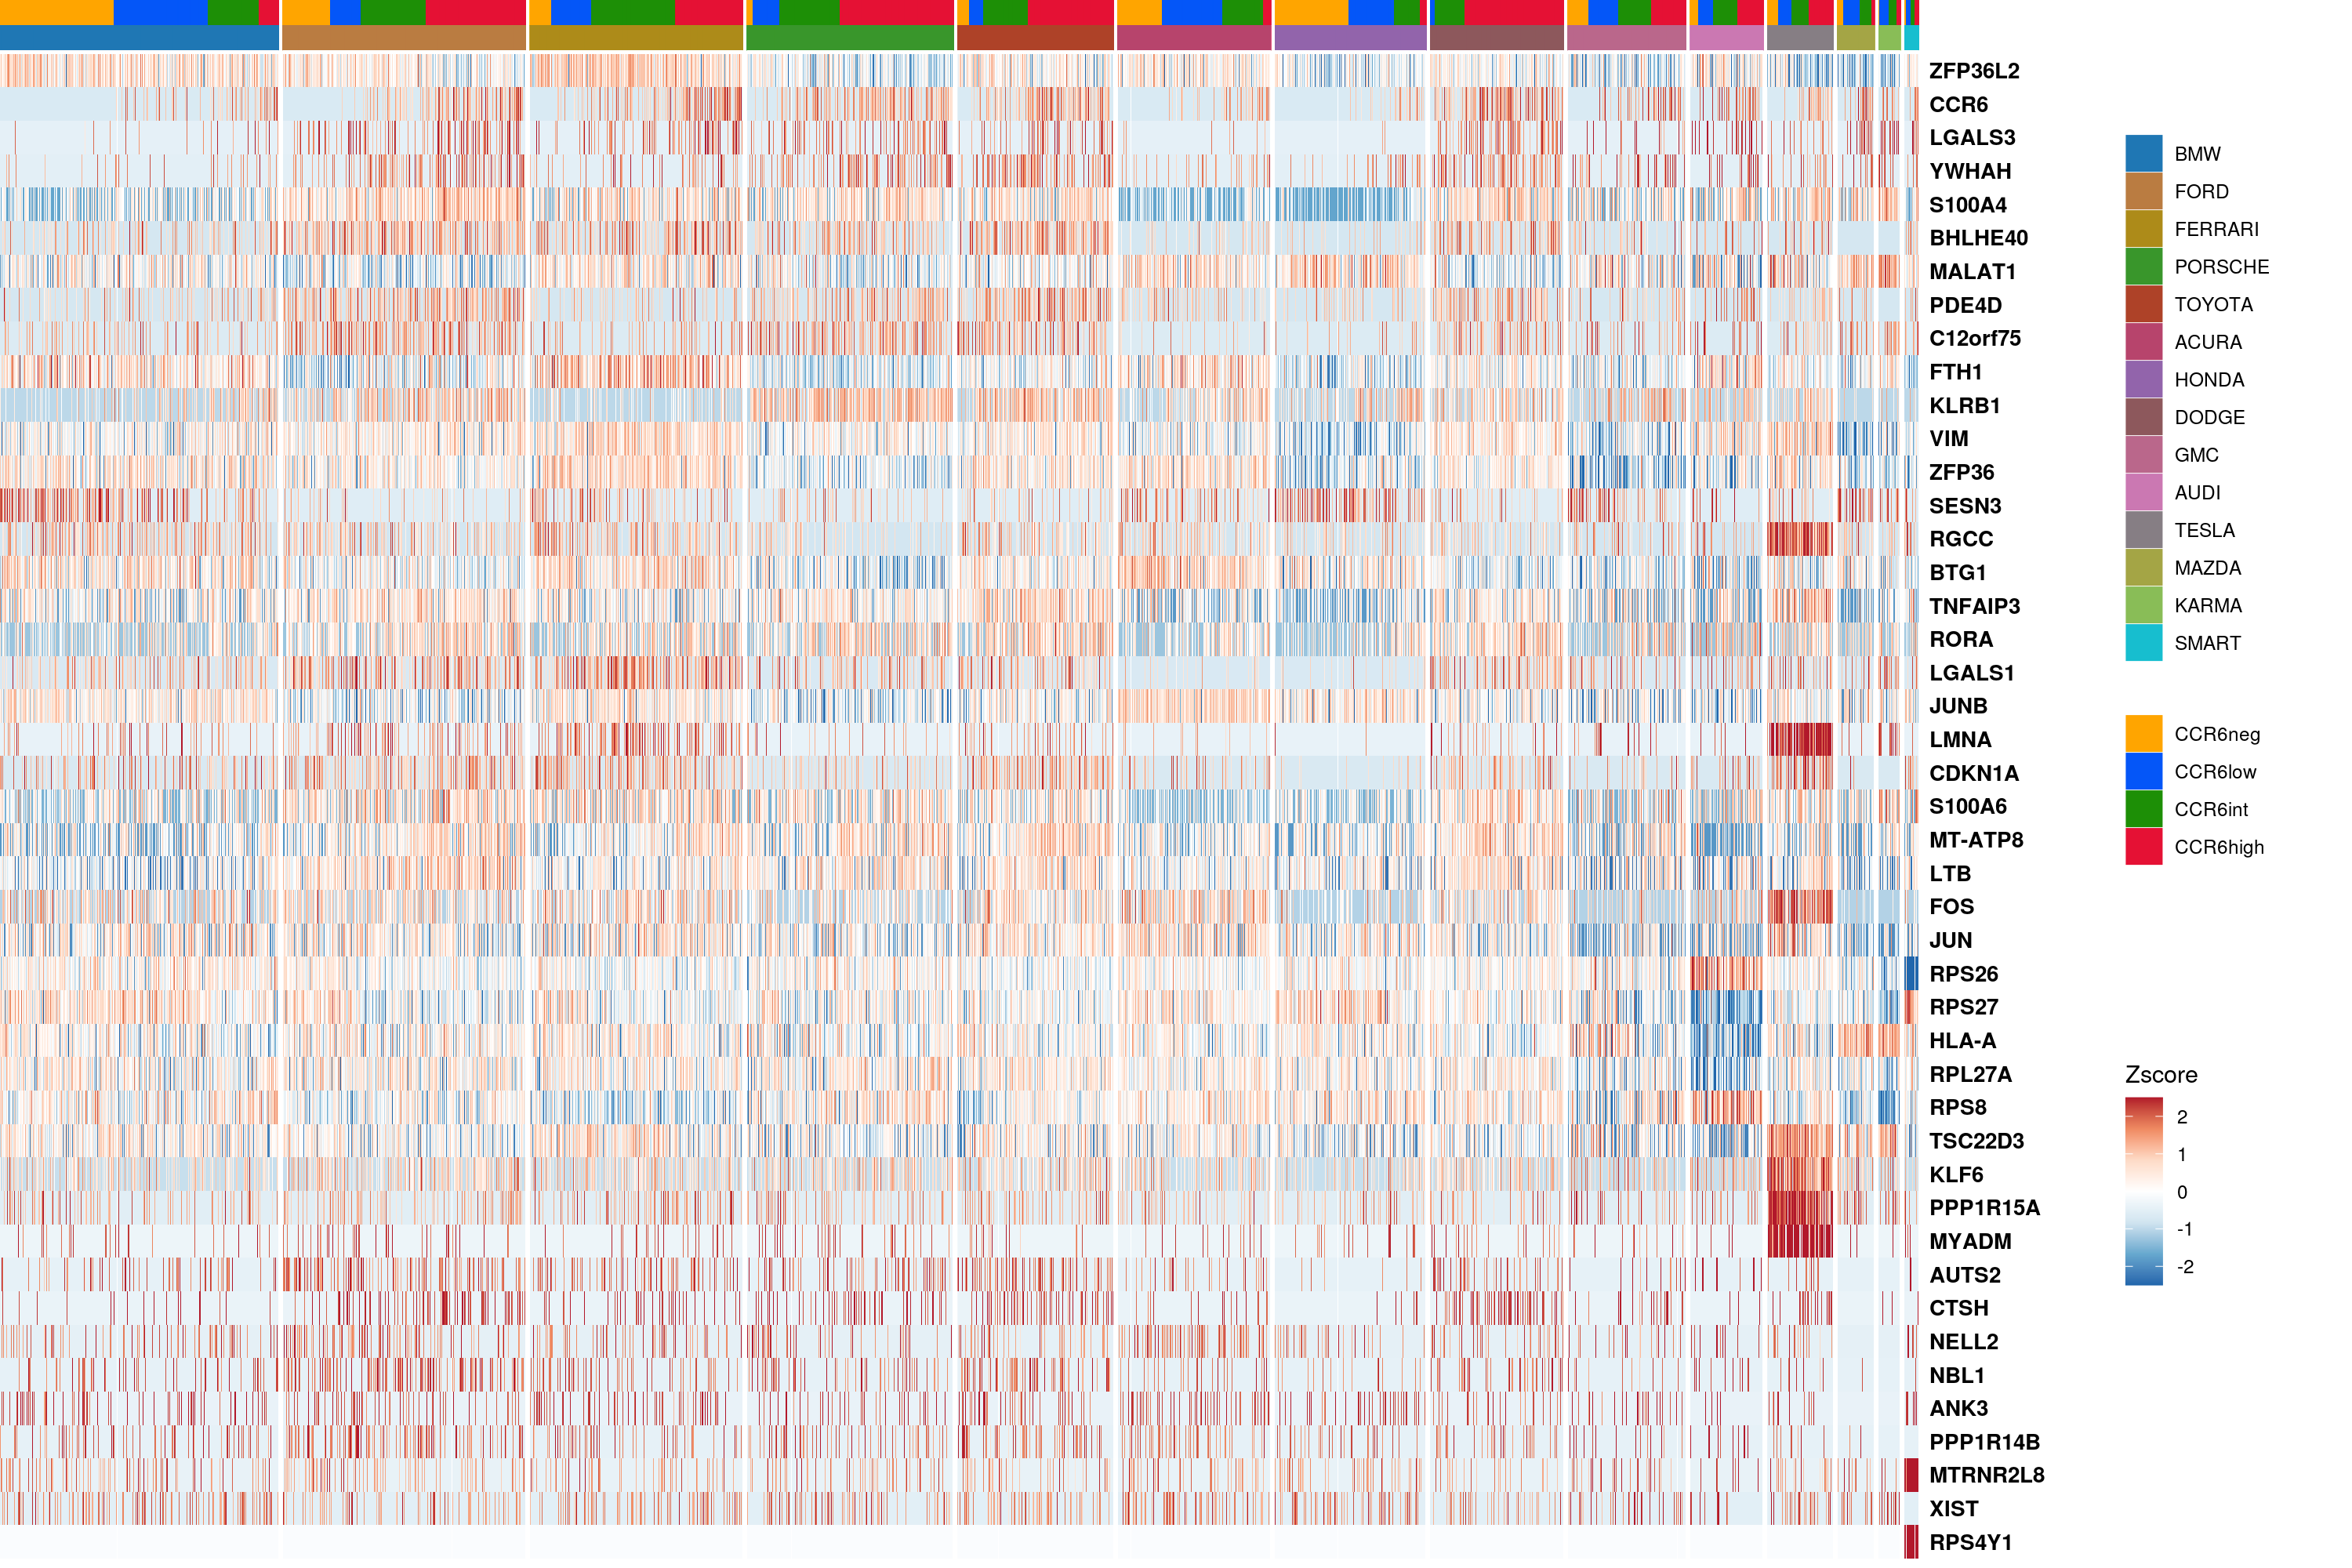

In [59]:
options(repr.plot.width=15, repr.plot.height=10, repr.plot.res = 200)
plot_grid(
    heatmap_base_annotation, 
    heatmap_base_annotation_legend, nrow = 1, rel_widths = c(10, 1.5), rel_heights = c(10, 2)
)